# BÀI TẬP VỀ NHÀ

**Nguyễn Hồng Đăng**

Sử dụng các phương pháp cải thiện chất lượng ảnh đã học để cải thiện các ảnh trong thư mục homework. Đối với các trường hợp sử dụng cân bằng histogram, vẽ histogram của ảnh trước và sau khi áp dụng.

In [1]:
from IPython.display import Image

import matplotlib.pyplot as plt
import cv2
import numpy as np

**Hàm vẽ histogram của ảnh**

In [2]:
def histogramVisualize(img):
    plt.autoscale(enable=True, axis='y', tight=True)
    if len(img.shape)==2:
        plt.hist(img.ravel(),256,[0,256])
        plt.show()
    else:
        color = ('b','g','r')
        for i,col in enumerate(color):
            histr = cv2.calcHist([img],[i],None,[256],[0,256])
            plt.plot(histr,color = col)
            plt.xlim([0,256])
        plt.show()

### Khử nhiễu

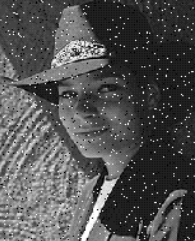

In [3]:
Image('homework/noise.png')

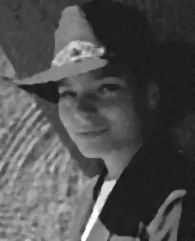

In [4]:
img=cv2.imread('homework/noise.png',cv2.IMREAD_GRAYSCALE)
img=cv2.medianBlur(img,5)
cv2.imwrite("homework/new_noise.png",img)
Image("homework/new_noise.png")

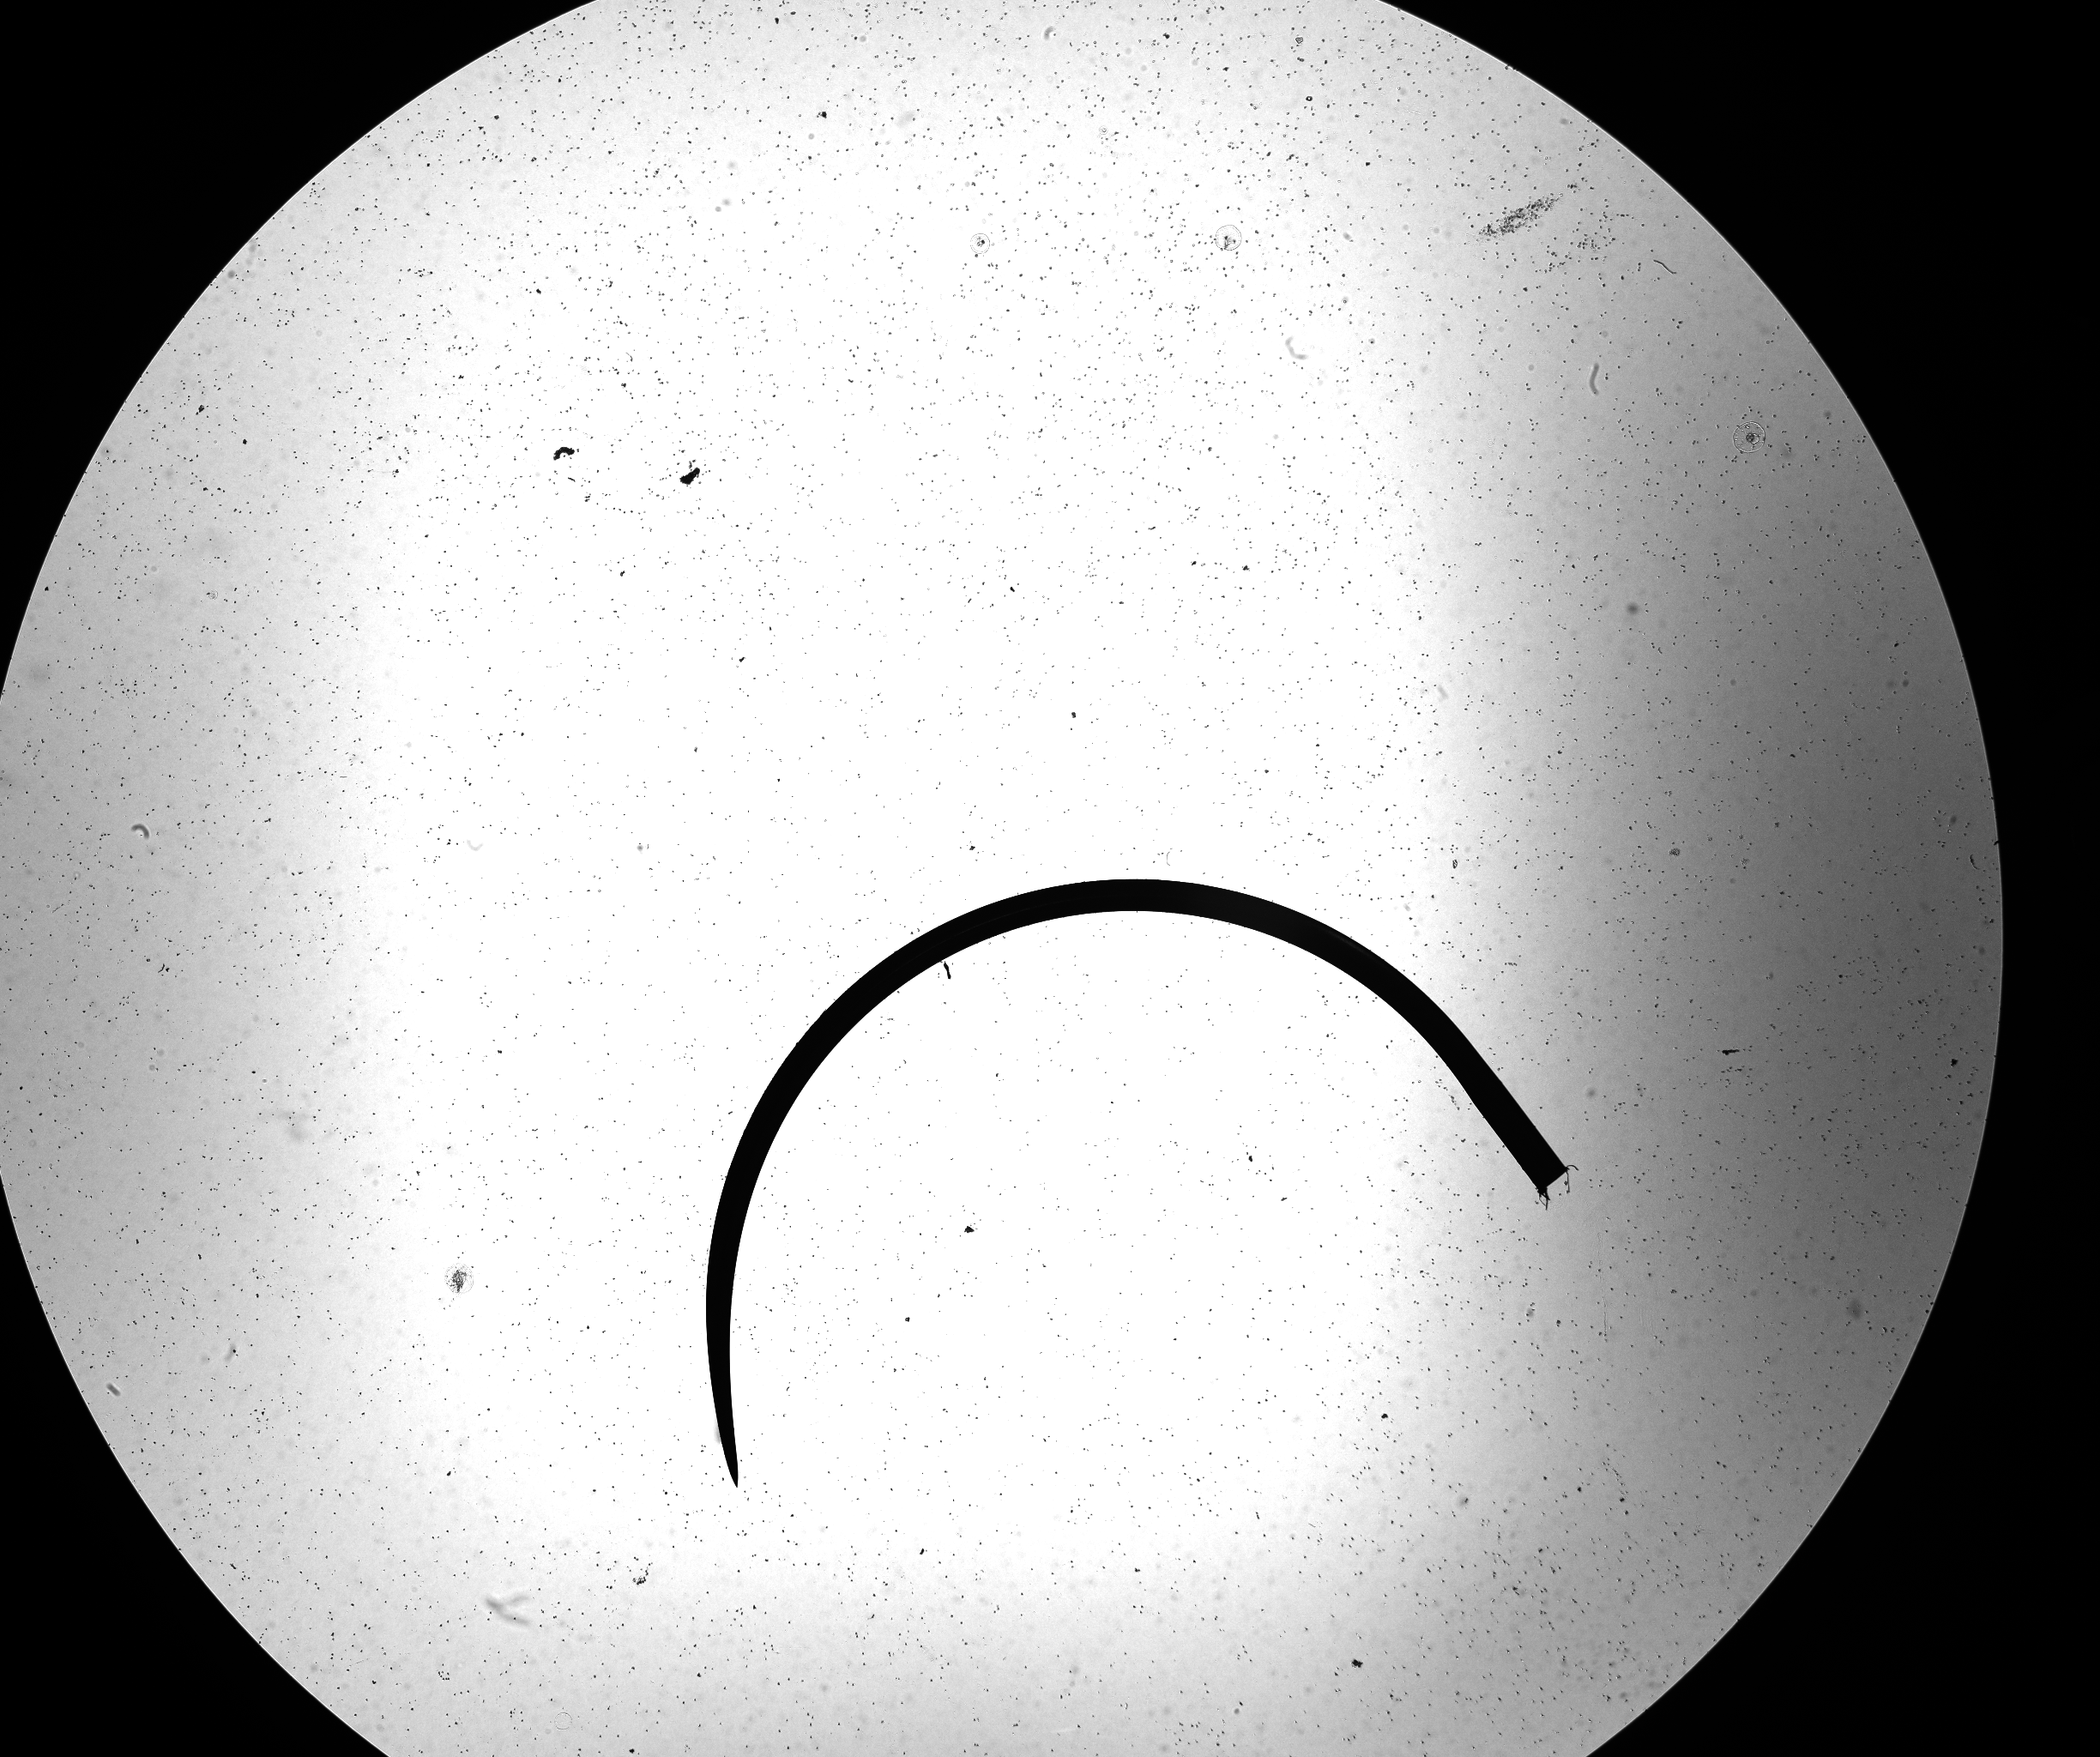

In [5]:
Image('homework/needle2.png')

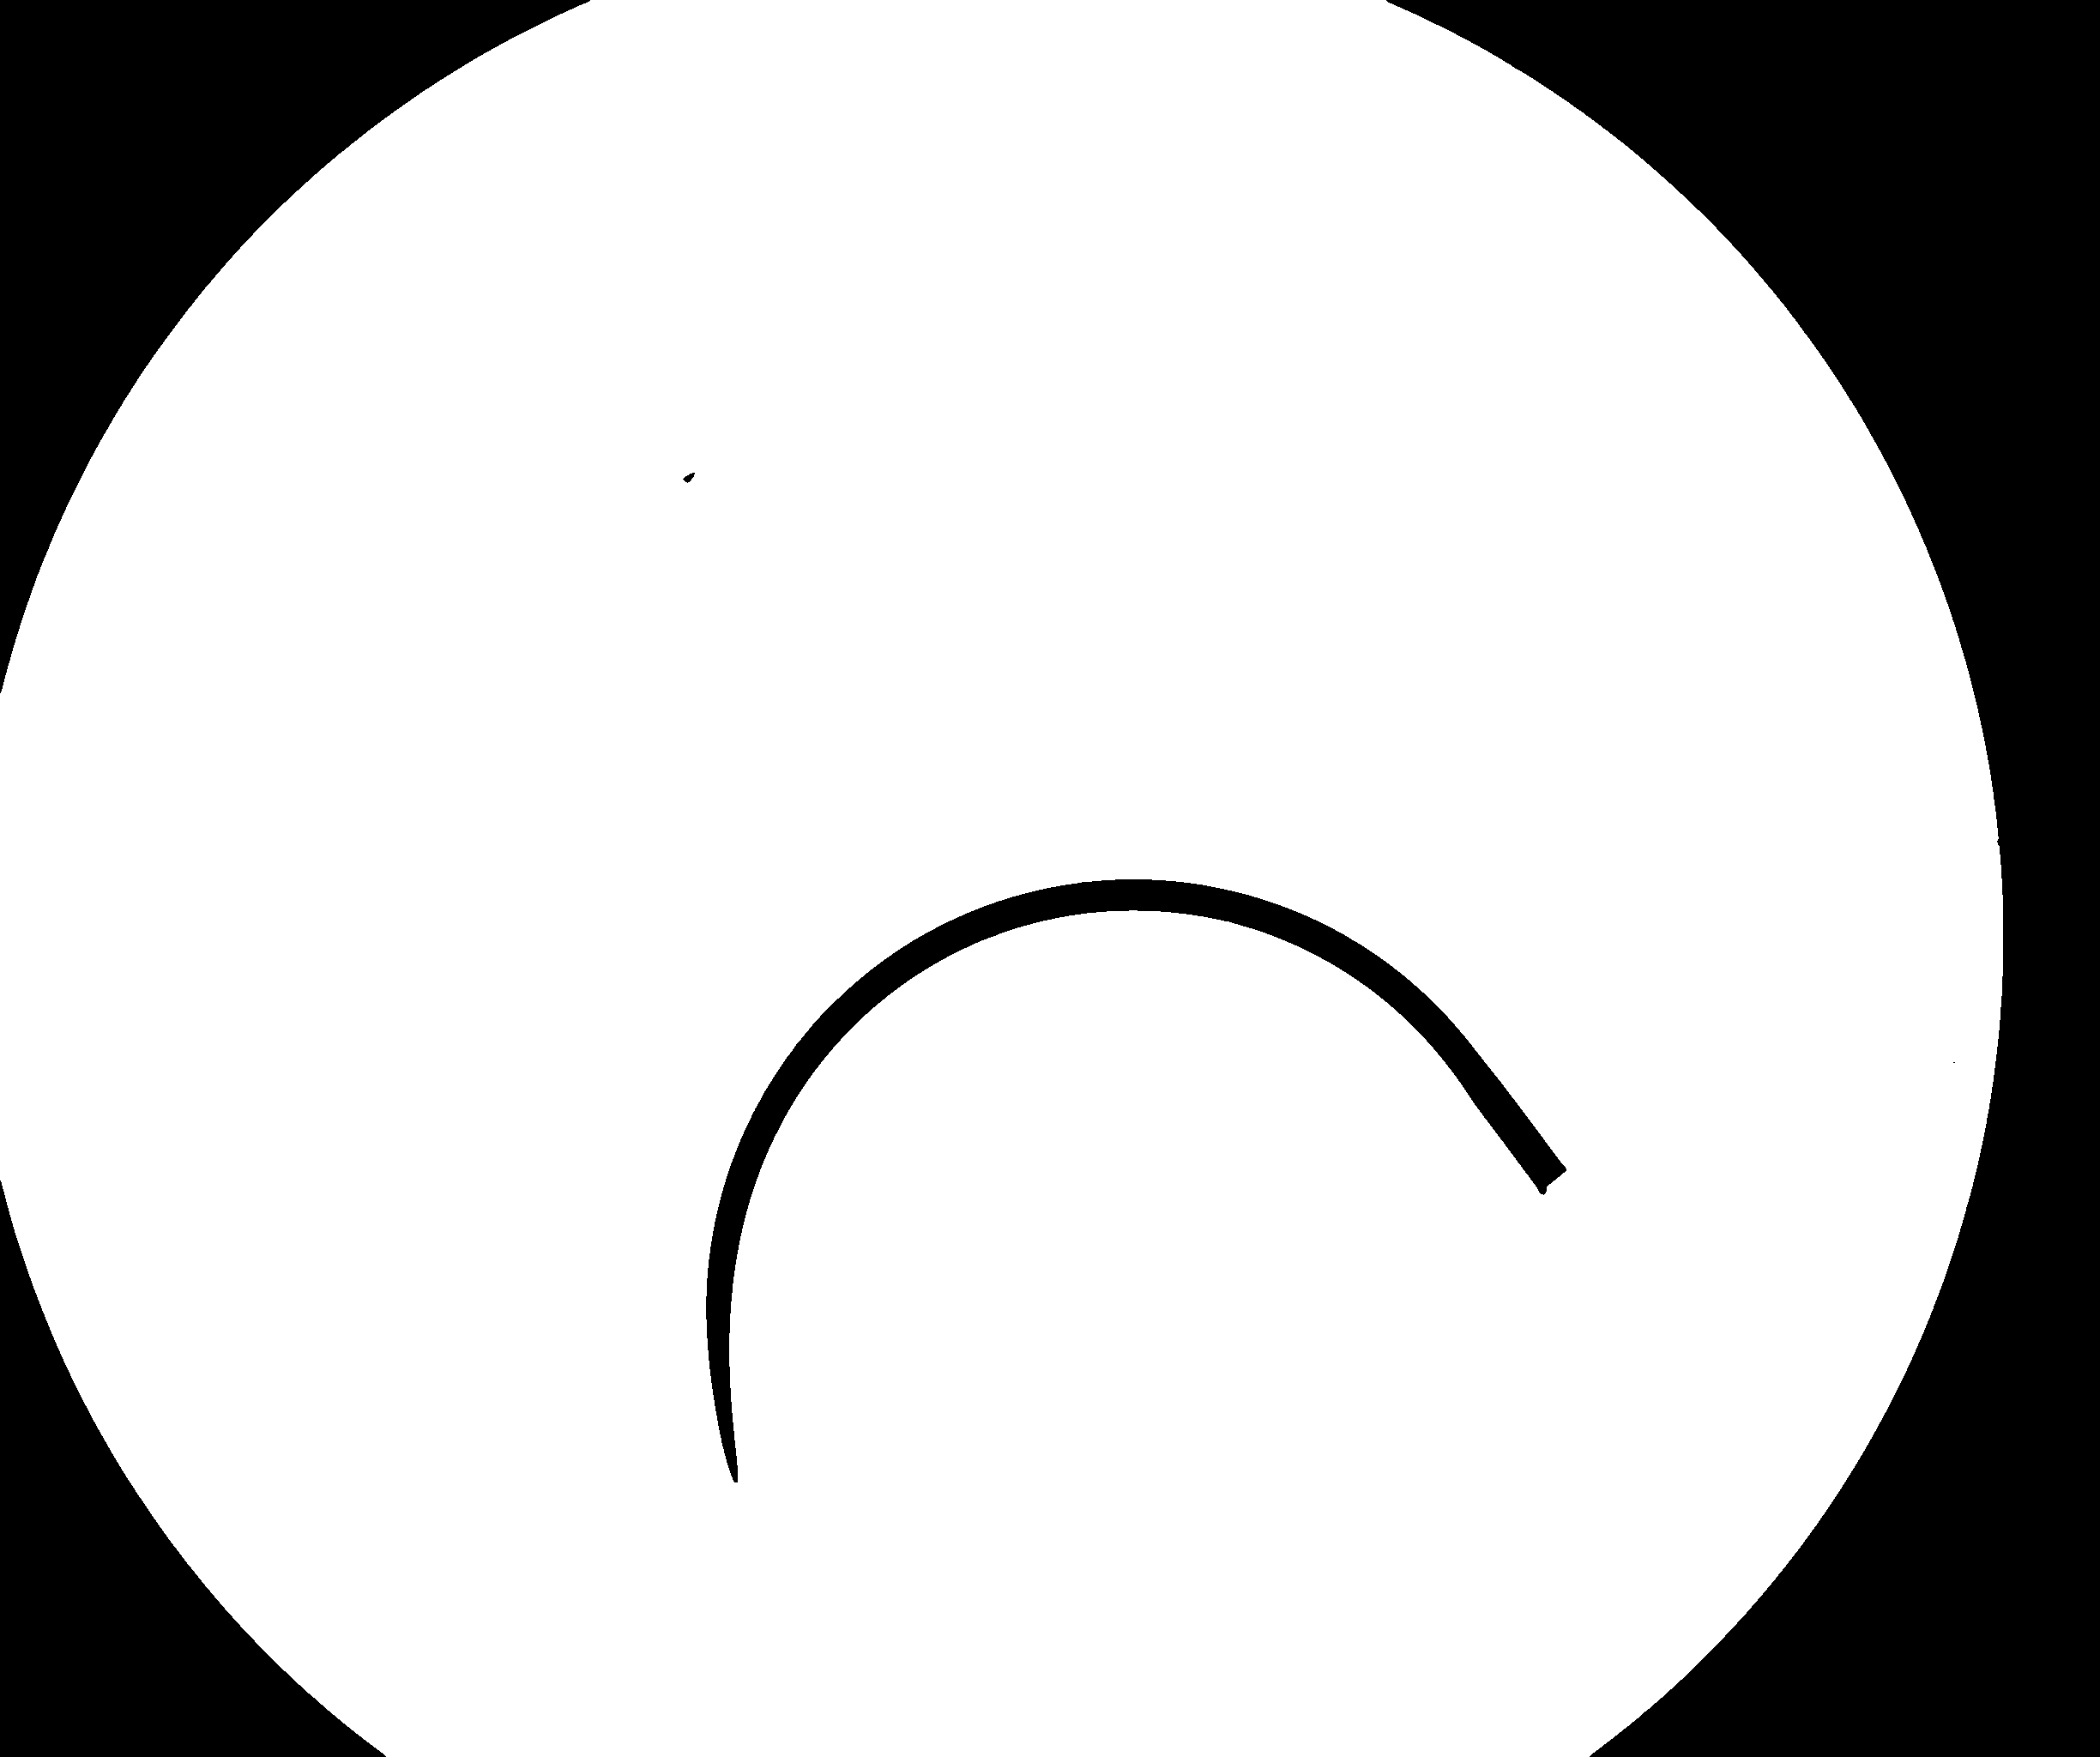

In [6]:
img=cv2.imread('homework/needle2.png',cv2.IMREAD_GRAYSCALE)
thresh_val,img=cv2.threshold(img,21,255,cv2.THRESH_BINARY)
img=cv2.medianBlur(img,7)
cv2.imwrite('homework/new_needle2.png',img)
Image('homework/new_needle2.png')

### Cải thiện chất lượng

**Gamma correction function**

In [7]:
def gammaCorrection(img, gamma):
    if len(img.shape)==2:
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                    img[i,j] = ((int(img[i,j])/255.0) ** gamma)*255
    elif len(img.shape)==3:
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                for k in range(img.shape[2]):
                    img[i,j,k] = ((int(img[i,j,k])/255.0) ** gamma)*255
    else:
        raise
    return img

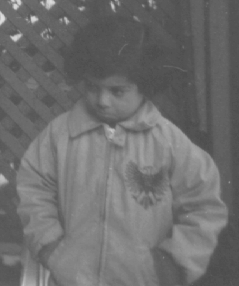

In [8]:
Image('homework/kid.png')

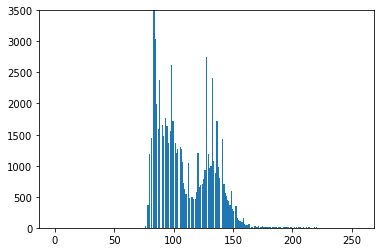

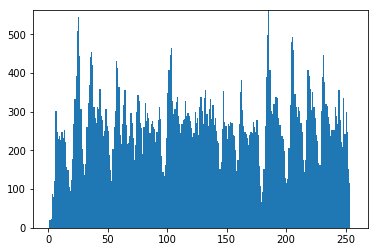

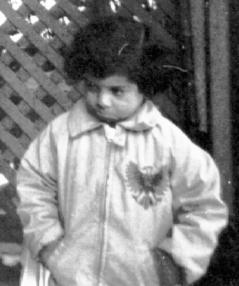

In [9]:
img=cv2.imread('homework/kid.png',cv2.IMREAD_GRAYSCALE)
histogramVisualize(img)

img=cv2.equalizeHist(img)
img=cv2.GaussianBlur(img,(3,3),0.5)

histogramVisualize(img)
cv2.imwrite('homework/new_kid.png',img)
Image('homework/new_kid.png')

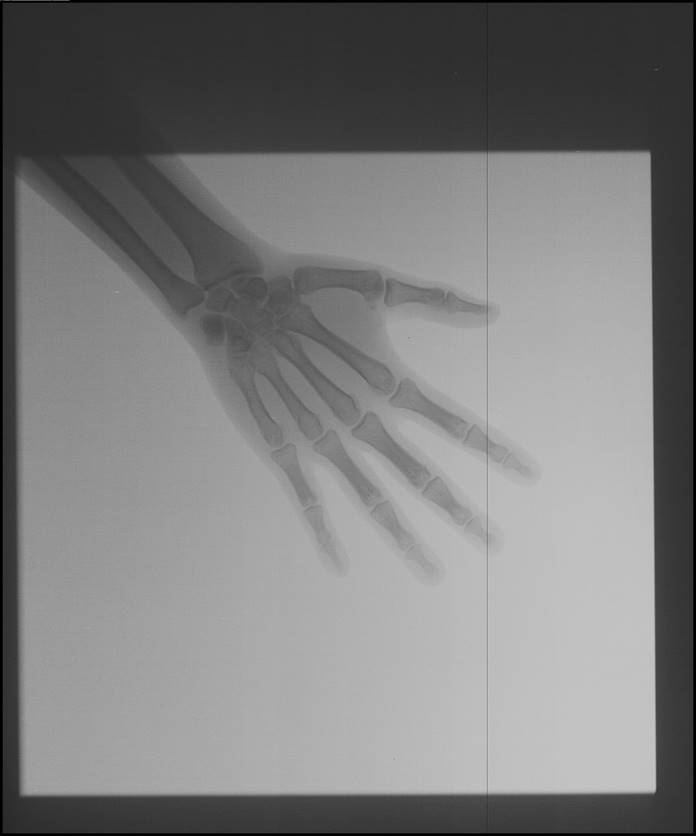

In [10]:
Image('homework/hand.jpg')

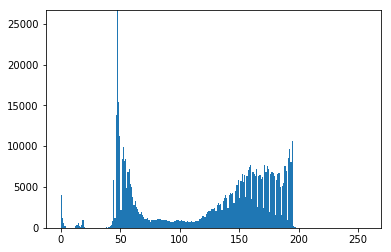

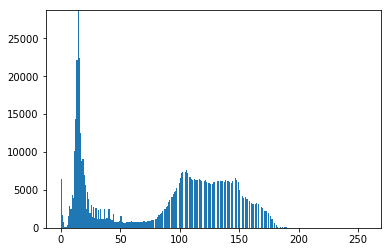

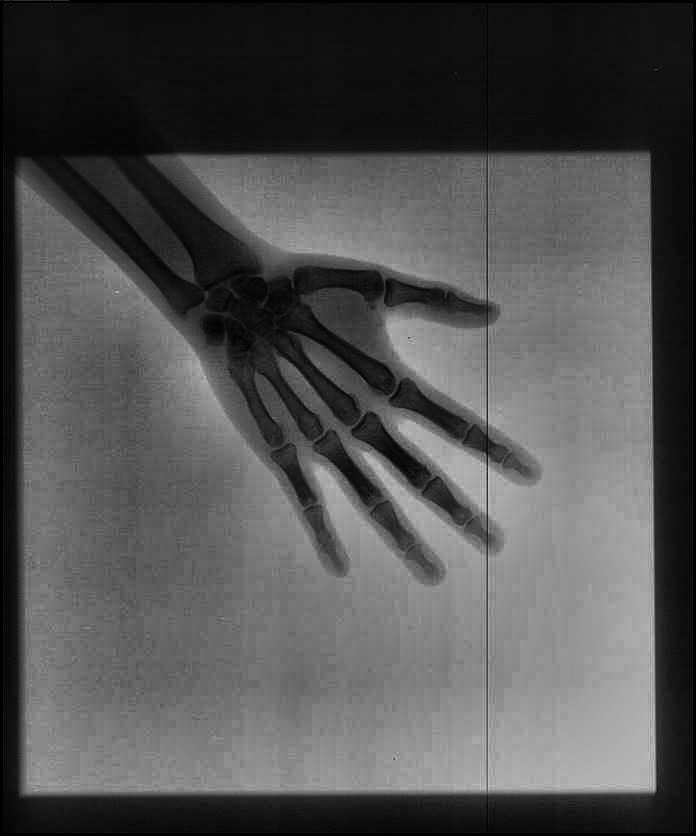

In [11]:
img=cv2.imread('homework/hand.jpg',cv2.IMREAD_GRAYSCALE)
histogramVisualize(img)

clahe=cv2.createCLAHE(3,(8,8))
img=clahe.apply(img)
img=gammaCorrection(img,2)
histogramVisualize(img)
cv2.imwrite('homework/new_hand.jpg',img)
Image('homework/new_hand.jpg')

### Tăng sáng

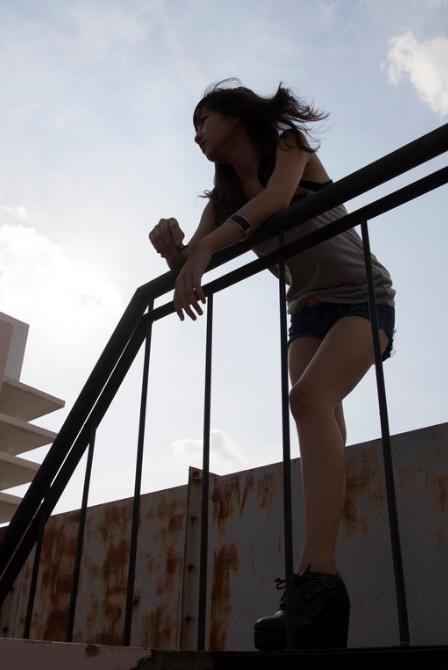

In [12]:
Image('homework/girl2_dark.jpg')

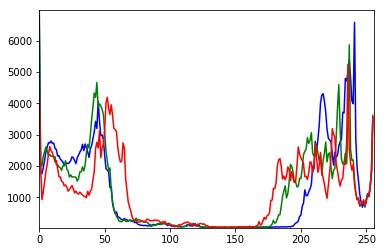

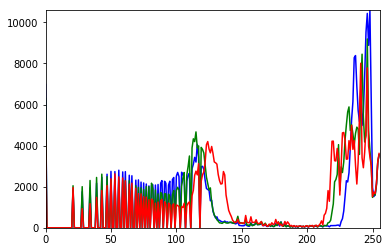

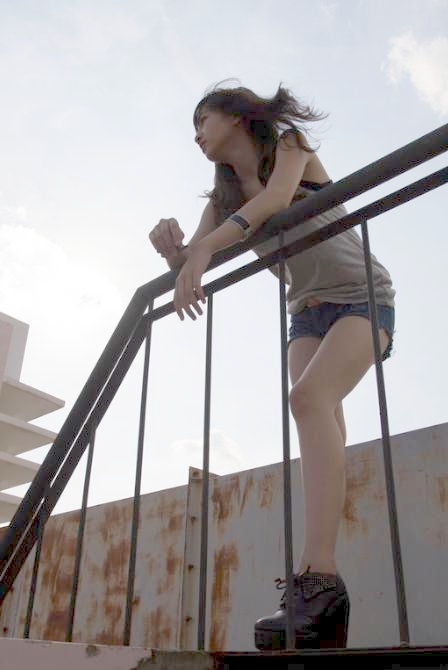

In [13]:
img=cv2.imread('homework/girl2_dark.jpg')
histogramVisualize(img)

img=gammaCorrection(img,0.45)

histogramVisualize(img)
cv2.imwrite('homework/new_girl.jpg',img)
Image('homework/new_girl.jpg')

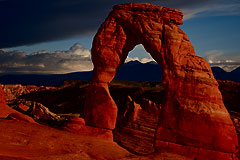

In [14]:
Image('homework/mountain_dark.jpg')

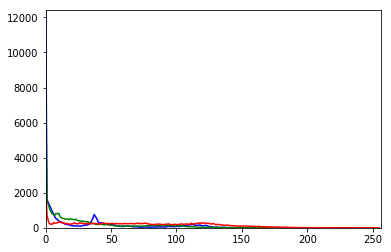

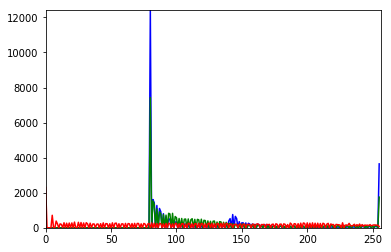

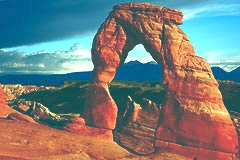

In [15]:
img=cv2.imread('homework/mountain_dark.jpg')
histogramVisualize(img)

img[:,:,2]=cv2.equalizeHist(img[:,:,2])
img[:,:,:2]=cv2.convertScaleAbs(img[:,:,:2],alpha=1.7,beta=80)

histogramVisualize(img)
cv2.imwrite('homework/new_mountain_dark.jpg',img)
Image('homework/new_mountain_dark.jpg')